# **Anatomy of Computer Nueral Network**

🕯️ _'An technician's job is not to simply use a tool and become slave of it, but to break the tool and build it from scratch in order to make it serve.'_

🔖 **References**
- This live playbook is inspired by the work of Andrew Trask's book: grokking Deep learning.
- Narrative and use cases are different based upon my own blog's and experience.

📝 **Author**: Reeshabh Choudhary

# 🤝 Introduction

An invention find its inception in philosphy first and then it takes form in physical reality. It was the philosphical understanding of emptiness or void which laid the ground work for the mathematical adaptation of the number zero. Humans have always been fascinated with finding explcit expression to the implicit ideas in their mind. Like grammar of a language is an explicit discovery of the rules of the langugae. Mathematics is a tool based on series of ideas and their relationship with each other.

Galileo Galilei famously wrote: "_Philosophy is written in this grand book, the universe, which stands continually open to our gaze. But the book cannot be understood unless one first learns to comprehend the language and read the letters in which it is composed. It is written in the language of mathematics, and its characters are triangles, circles, and other geometric figures without which it is humanly impossible to understand a single word of it; without these, one wanders about in a dark labyrinth_". 

Neural Networks are no differnt. The concept of neural networks draws inspiration from the intricate information processing of human neurons and its implementations are based upon differnet mathematical expressions which reflect its decison making ability. Consider this scenario: 

There is a football match being organized in your locality. Your favorite team is playing the match and you are trying to _choose_ if you want to attend the match or not. Your pending _choice_ lies on three factors: 
- Is it a weekday or weekend?
- Are your friends going to join you?
- Is your favorite player going to play the match?

Now, these three factors can be represented by three variables say x1, x2 and x3 and the responses can be captured in binary format. 'Yes' will be marked as 1 and 'No' will be marked as 0.  In total 8 scenarios are possible, however the outcome is also in binary i.e. either you will go the football match (1) or you will not go (0). 

Suppose, match is on weekend but you do not want to go without your friends. But if your favorite player is going to play the match, you may probably consider going without your friends as well even though it is a weekday. 

> _What is Choice? It is the process of selecting most probable possibilities from a limited set of options._

What we are doing here is considering the weight (w1, w2 and w3) each of the three factors press in the choice making to reach a final choice. And this can be well represented in a **perceptron model** proposed by Frank Rosenblatt in 1958, which aimed to simplify neural behavior to essential mathematical operations. The perceptron model does not quite mimic the brain functionality but it is one of the basic expressions of choice making process we employ in real-life secnarios.

The perceptron model equation can be expressed as:

$$
f(x) = 
\begin{cases} 
1, & \text{if } w \cdot x + b > threshold, \\
0, & \text{otherwise}
\end{cases}
$$

Where:

$$
w \cdot x = \sum_{i=1}^m w_i x_i
$$

Here, _w_ denotes a vector of real valued weights, _m_ is the number of inputs to the perceptron, and _b_ is the bias. For now do not worry about the terminology as we will be doing exercises to cover them. 

---

🔍 We have used the term '_model_' here? So what exactly **_modelling_** means?
Modelling refers to an abstract representation that captures essential behaviors or relationships, not necessarily physical form. For instance, consider different car models from differnt brands or companies being displayed at Auto Expo. Since all the models of a particular company can not be displayed, a car making company choses a model  which best represents the company's overall charachteristics, philosophy and design principles. Likewise, sceintific models articulate a concept that defines the general charachteristics of the environment it is trying to mimic. Although, the natural world scenario is quite chaotic with different parameters at play, a model tries to approimate useful predictions. A model is often based on certain assumptions and simplifications. It helps to manipulate and understand representaion of the phenomenon without observing the phenomenon itself.

Scientific models require a mathematic approach to generalize and understand a phenomenon through a set of observations (_data_).

---
> A perceptron is a fundamental building block of artificial neural networks and serves as a simple model of information construction from sensory units. A perceptron receives multiple binary inputs, denoted as x1, x2, x3, ..., where each can be either 0 or 1 and produces a single binary output. Additionally, there are corresponding weights w1, w2, w3, ... associated with each input. The weights represent the importance or significance of each input in influencing the perceptron's output. The perceptron computes a weighted sum of the inputs and weights. This is done by multiplying each input by its corresponding weight and summing up these weighted values. The perceptron then compares the weighted sum to a threshold value. The threshold is a parameter of the perceptron that determines the point at which the perceptron will "fire" and produce an output of 1. If the weighted sum is greater than or equal to the threshold, the perceptron outputs 1; otherwise, its output is 0. By varying the weights and the threshold, we can get different models of decision-making. 


👆The example scenario presented above is very simplistic one and falls under binary classification problem. However, in real-life the datasets can be in texts, images, videos, etc. 
Since, computers can’t digest texts or images or other formats of data, it becomes essential to represent data in numerical format in Machine Learning (ML). ML models need input to be _transformed_ or _encoded_ into numbers. And to do so we seek shelter in _Linear Algebra_!

Let us look a small sample dataset to better our understanding.

| Subject | Height (cm) | Weight (kg) | Age |
|---------|-------------|-------------|-----|
| Person 1| 170         | 80          | 30  |
| Person 2| 160         | 75          | 20  |
| Person 3| 158         | 78          | 25  |

Each dataset resembles a table-like structure consisting of rows and columns, where each row represents observations, and each column represents features/variables. And a table like structure is represented using Matrices in Linear Algebra and it is represented using arrays  in computers. 

- **_Scalars_** are single numerical values that represent a single feature or data point. They are simple and easy to understand, as they only represent one piece of information. In above dataset, each individual height and weight is a scalar. For example, the height of Person 1 (170 cm) is a scalar value, and the weight of Person 2 (75 kg) is also a scalar value. Each scalar represents a single attribute of a person.

- **_Vectors_** are 1-dimensional arrays that can represent multiple features together. Each element in the vector corresponds to a specific feature or attribute. For our example dataset, we can create three vectors to represent the dataset in form of Height, Weight and Age.

📌 **NOTE:** The very popular Python library _NumPy_ is just a wrapper library for representing array of arrays and equipped with matrix oriented functions.



🎯 **Purpose: The aim of this article is to understand how a neural network can be developed from scratch.**

## 1️⃣ Setting up Network 🥅

🎢 Prediction is always based on input. We do this activity commonly in daily life. For example, if there is lot of humidity, we predict rain around the corner. Based upon new government regulations such as tobacco ban for instance, we predict the rise and fall of stock prices of a listed company selling tobacco based product. In India, ITC is one such company whose stock price is always the talk of the town after a financial budget.

For a neural network to predict, it must process the data points passed to it as set of observations or _input_. But, it is difficult to process information and output predictions without any knowledge. So, neural network assigns weight to the information recieved. This is what we did when we discussed the football match decison making scenario. We assigned weights to input data points and based upon that we can try to predict the final outcome. 

> _More data points we expose our network, more it optimizes its weight for reaching the desired output. It is an ever continuous process where weights keep evolving._ 🧠

🥜 In a nutshell, a neural network makes predictions based upon the weight given to the input data points. If a certain input plays a dominant role in the outcome, it is given larger weight and conversely smaller weight is assigned if input's role is less dominant. 

⚖️ To represent this understanding mathematically, we would _scale_ the input corresponding to its weight. _Scaling_ is nothing but simple multiplication. Based upon weight, the input data point si scaled up or down.

### Simplest Neural network with single input datapoint. 

🦾 Enough of talks and theories, now we get our hand dirty and put whatever we learnt so far into practice. We start from a bare minimal neural network and then we will build on top of it as we learn more concepts. 

🔭 One common observation we apply in our daily lives is to categorize individuals in adult(1) or child(0) category based upon parameters their height, weight, body shape, face, etc. Let us perform this exercise with simplest parameter, say height. 

💉 So, we narrow down the goal of a simple neural network to predict whether a person is adult or child based upon the person's height as an input factor.

🫏 **Assumptions:**
- Values closed to 1 will be classified as adult and closer to 0 will be classified as child. A classic binary classification problem.
- We start with an arbitrary weight value i.e. 0.15 with a generalized assumption that person below 4ft would be considered a child and above 4ft would be considered an adult.

In [ ]:
# height of individuals in 'ft'
person_height = [5.5, 2.5, 6.4, 7, 2.3]

# We start with an arbitary weight value
weight = 0.15

def neural_network(input, weight):
    prediction = input * weight
    return prediction

input = person_height[0]
pred = neural_network(input, weight)
pred


> For the first input passed to our network, it predicts that there is 82.5% chance that the person is an adult.

### 🫸Raising complexity: Multiple Input Points

Not bad for starters, however, real world scenarios rarely involve single input data point. To do a prediction, every single input parameter's weight and value will be considered in this scenario. This activity is called calculating _Weighted Sum_.

For a single neuron, the weighted sum is calculated as:

$$
z = \sum_{i=1}^n (x_i \cdot w_i) + b
$$

Where:

$$
x_i: \text{The $i$-th input feature (e.g., height, weight, etc.)} \\
w_i: \text{The weight associated with the $i$-th input feature (learned by the network)} \\
b: \text{The bias term (an additional constant that shifts the output, also learned by the network)} \\
n: \text{The total number of inputs to the neuron}
$$


📏 In real world, different input points when represented mathematically will be on different scale. For example, A person's age may vary from 0-75 years, however his height may vary from 2ft to 7ft and weight may vary from 25lbs to 250lbs, etc. 

⚖️ Problem starts when we start treating these input parameters on the same scale. Remember, input is scaled by the weight associated. This may cause the network to place undue importance on features with larger numerical values, not because they are more important, but because of their scale. The larger values (like weight and age) will dominate the smaller ones (like height) in computations like the weighted sum.

🖐️ Hence, it is highly recommended to bring the input parameters on same scale before exposing them to network and the process is called **_Normalization_**. It ensures that each input factor contributes proportionally based on its actual importance rather than its scale. 

Generally, normalized value of an input value is calculated as:

$$
\text{Normalized Value} = \frac{\text{Value} - \text{Min Value}}{\text{Max Value} - \text{Min Value}}
$$



⏭️ Now, we capture more than one input points. Apart from height of individuals, we also capture their weight, age and hair greying scale and based upon these inputs and given weights wrt inputs, we try to predict the outcome.

In [31]:
# Weighted Sum Calculation
def w_sum(a, b):
    if (len(a) == len(b)):
        output = 0
    for i in range(len(a)):
        output += (a[i] * b[i])
    return output

# Normalization
def normalize_inputs(input_data, min_values, max_values):
    return [(input_data[i] - min_values[i]) / (max_values[i] - min_values[i]) for i in range(len(input_data))]

# Setting up Neural network
def neural_network(input, weights):
    pred = w_sum(input, weights)
    return pred

Alternatively, a library such as numPy can be used to calculated weighted sum:

`
def neural_network(input, weights): 
    pred = input.dot(weights)
    return pred
`

In [ ]:

# Initializing arbitary weights w.r.t input values
weights = [0.15, 0.01, 0.02, 0.5]
# defining input parameters
person_height = [5.5, 2.5, 6.4, 7, 2.3]
person_weight = [150, 30, 180, 220, 25]
person_age = [25, 4, 30, 35, 3]
person_greying = [0.2, 0.0, 0.1, 0.3, 0.0]
# Min values for [height, weight, age, hair greying]
min_values = [2.3, 25, 3, 0.0]
# Max values for [height, weight, age, hair greying]
max_values = [7.0, 250, 100, 1.0]
# First set of datapoints
input = [person_height[0], person_weight[0], person_age[0], person_greying[0]]
normalized_input = normalize_inputs(input, min_values, max_values)
print("Normalized Input:", normalized_input)
# Passing normalized input to the network
pred = neural_network(normalized_input, weights)
print(pred)

👁️ As other factors come into play, the prediction value has changed significantly. Now it is just a raw score rather than a probability or prediction.

📌 **Note:** So far weights are constant. We are not adjusting anything or considering any feedback or validating outputs. We will come to that later. Our focus is right now to set up a network first and later we shall make it smarter by adjusting weights.

### 🫸Raising complexity: multiple inputs and multiple outputs

Since, we have multiple outcomes to predict and associated weights w.r.t to the outcomes and input parameters are defined, we will deal with a 2-D array. The underlying process remains same but will have to do vector-matrix multiplication of each input parameter wrt to weight assigned to it in reference to an output parameter.

- For example: Input parameter 'height' has '0.15' weight associated to predict 'Whether individual is adult or not?' and '0.2' weight associated to predict 'Overall Health score (1-100)'.

🔑 _While making three independent predictions, the network will calculate three independent weighted sums of the input._

In [33]:
# Normalization
def normalize_inputs(input_data, min_values, max_values):
    return [(input_data[i] - min_values[i]) / (max_values[i] - min_values[i]) for i in range(len(input_data))]

# Weighted Sum function
def w_sum(a, b):
    if len(a) == len(b):
        output = 0
        for i in range(len(a)):
            output += a[i] * b[i]  # Weighted sum of inputs
    return output

# Vector-Matrix multiplication function which calculates the weighted sum of inputs w.r.t to weights
def vect_mat_mul(input, weights):
    if len(input) == len(weights[0]):
        output = [0, 0]  # Adjusted to 2 outputs
        for i in range(len(weights)):  # Loop for each output
            output[i] = w_sum(input, weights[i])  # Calculate weighted sum for each output
    return output

# Neural network
def neural_network(input, weights):
    pred = vect_mat_mul(input, weights)
    return pred


In [ ]:
# Initializing arbitary weights w.r.t input values
weights = [
    [0.15, 0.01, 0.02, 0.5],  # Weights for adult probability output
    [0.2, 0.005, 0.01, 0.4]  # Weights for overall health score output
]

# defining input parameters
person_height = [5.5, 2.5, 6.4, 7, 2.3]
person_weight = [150, 30, 180, 220, 25]
person_age = [25, 4, 30, 35, 3]
person_greying = [0.2, 0.0, 0.1, 0.3, 0.0]
# Min values for [height, weight, age, hair greying]
min_values = [2.3, 25, 3, 0.0]
# Max values for [height, weight, age, hair greying]
max_values = [7.0, 250, 100, 1.0]
input = [person_height[0], person_weight[0], person_age[0], person_greying[0]]
normalized_input = normalize_inputs(input, min_values, max_values)

# Output from neural network
prediction = neural_network(normalized_input, weights)
print("Predicted Adult Probability and Health Score:", prediction)

👆 Notice that predicted Adult probablity is the same as calculated earlier, which gives proper evidence that our network is predicting output independently.

Also, if we want the health score prediction to be represented in a different range (e.g., 0 to 100 for better interpretability), we can scale it accordingly. We just have to apply Apply a simple scaling transformation to map the values:
$$
Health Score (0 to 100)=Prediction×100
$$

📌 **Note:** Prediction of a neural network is being calculated by taking dot prodct of two vectors namely _input_ and _weight_ . A dot product of two vectors represents similarity between the two vectors. When the product is large then the two vectors are aligned or pointing in similar dorection and when product is small then the vectors are unrelated or pointing in opposite direction. Neural networks adjust weights during training to maximize this similarity for correct predictions

📌 **Note:** We are currently providing just one training example as input. We continue to do so for a while until we build upon the concepts.

### 🥷 Hidden Layers

So far, we have been dealing with patterns which are very simplistic, however, real-life scenarios are far more complex.

> 🔨In essence, a neural network is a tool which looks for correlation between input and output datasets.
However, in real world there will hardly be situations where input data will directly corelate with the output dataset. And just one-layered neural network won't be enough to understand such relations. 

🔎 In order to find correlation between input and output for correct prediction, we make a gradual adjustments in the network. Rather than just trying to figure out direct correlation from input to output, we try to look for an intermediate state which has limited correlation with the output and based upon it we try to predict output. We call these intermediate state(s) as _layer(s)_.
Hence, multiple hidden layers are added to neural networks between input layer and output layer to find relationships in complex scenarios. 

🥷 **These hidden layers are nothing but different combination of weights per scenario.** 🥷

_Output of one layer is feeded to next layer and so forth,_ till we reach to a final conclusion. 🎯

This is also called **Forward Propagation**.

### 🫸 Let us now introduce a hidden layer with different weight combinations for above scenario.

> 📌Note: We are right now focussing on capturing linear relationships only. We will come to non-linearity later.

In [35]:
# Initializing arbitary weights w.r.t input values
        #    height weight  age greying
ip_weights = [[0.15, 0.01, 0.02, 0.5],  # Weights for adult probability output
              [0.2, 0.005, 0.01, 0.4]]  # Weights for overall health score output
# introducing hidden layer of weights
hd_weights = [[0.10, 0.07], # adult probablity
              [0.1, 0.5]]   # health score

# maintaining an array of weights
weight_layer = [ip_weights, hd_weights]

👆 In the _'hd_weights'_ we have an added layer, which will take output from first layer as input and apply corresponding weights w.r.t output parameters.

📌 **Note:** The underlying calculation remains same. We just add one added step in our neural network, where we feed the predictions from first layer to the next layer.

In [36]:
# Normalization
def normalize_inputs(input_data, min_values, max_values):
    return [(input_data[i] - min_values[i]) / (max_values[i] - min_values[i]) for i in range(len(input_data))]

# Weighted Sum function
def w_sum(a, b):
    if len(a) == len(b):
        output = 0
        for i in range(len(a)):
            output += a[i] * b[i]  # Weighted sum of inputs
    return output

# Vector-Matrix multiplication function which calculates the weighted sum of inputs w.r.t to weights
def vect_mat_mul(input, weights):
    if len(input) == len(weights[0]):
        output = [0, 0]  # Adjusted to 2 outputs
        for i in range(len(weights)):  # Loop for each output
            output[i] = w_sum(input, weights[i])  # Calculate weighted sum for each output
    return output

# Neural network
def neural_network(input, weight_layer):
    # First Layer: where we have inputs and first set of weights
    hid = vect_mat_mul(input, weight_layer[0])
    # Second Layer: where we have output of 'first layer' and second set of weights
    pred = vect_mat_mul(hid, weight_layer[1])
    return pred

In [ ]:
# defining input parameters
person_height = [5.5, 2.5, 6.4, 7, 2.3]
person_weight = [150, 30, 180, 220, 25]
person_age = [25, 4, 30, 35, 3]
person_greying = [0.2, 0.0, 0.1, 0.3, 0.0]
# Min values for [height, weight, age, hair greying]
min_values = [2.3, 25, 3, 0.0]
# Max values for [height, weight, age, hair greying]
max_values = [7.0, 250, 100, 1.0]
input = [person_height[0], person_weight[0], person_age[0], person_greying[0]]
normalized_input = normalize_inputs(input, min_values, max_values)

pred = neural_network(normalized_input, weight_layer)
print(pred)

🔑 **Important:** 
If we look closely, we can see that we are scaling the pattern (intermediate output) corresponding to health score with the hidden weight corresponding to adult probablity.

👁️ **Visualize:**

Original input for first person:
input = [5.5, 150, 25, 0.2]

-> After normalization (approximate values)
normalized_input = [0.68, 0.5, 0.22, 0.2]  # These are rough values based on your min/max

-> First Layer Calculation:
ip_weights = [
    [0.15, 0.01, 0.02, 0.5],    # Weights for output 1
    [0.2, 0.005, 0.01, 0.4]     # Weights for output 2
]

Output1 = (0.68 × 0.15) + (0.5 × 0.01) + (0.22 × 0.02) + (0.2 × 0.5)
        = 0.102 + 0.005 + 0.0044 + 0.1
        = 0.2114

Output2 = (0.68 × 0.2) + (0.5 × 0.005) + (0.22 × 0.01) + (0.2 × 0.4)
        = 0.136 + 0.0025 + 0.0022 + 0.08
        = 0.2207

-> After first layer we have: [0.2114, 0.2207]

--> Second Layer Calculation:
hd_weights = [
    [0.10, 0.07],    # Weights for final adult probability
    [0.1, 0.5]       # Weights for final health score
]

Final_Adult_Prob = (0.2114 × 0.10) + (0.2207 × 0.07)
                 = 0.02114 + 0.015449
                 = 0.036589

Final_Health_Score = (0.2114 × 0.1) + (0.2207 × 0.5)
                   = 0.02114 + 0.11035
                   = 0.13149


🙋‍♂️❓ **One may wonder why are we scaling output corresponding to health score w.r.t weight related to adult probablity in the hidden layer calculation?**

- What we have from the output of first layer is not strictly "preliminary adult assessment" and "preliminary health assessment". We can think of them as _learned features_ or _intermediate patterns_ that network will use in future.
- These learned features may contain useful information for the final prediction outcome. Hence, neural network takes them into consideration.

🥸 Let us consider a real world analogy. If someone is an adult, he/she might be taller and more muscular. Similarly, height-to-weight ratio and muscle mass both indicate health.

In case, we want to have strict seperation where first output only affects adult probability and second only affects health, we could have defined the hidden layer as follows:

In [38]:
# Commented code
# hd_weights = [
#     [1.0, 0.0],    # Only use first feature for adult probability
#     [0.0, 1.0]     # Only use second feature for health score
# ]


⚠️ However, this pre-defined clear seperation will severely limit the ability of the network to learn complex patterns.

# 2️⃣ Learning the errors

In the earlier steps, we were able to make predictions but we were not comparing them with the actual results to judge the margin by which the predictions missed. This margin is called 'Error'.

> The Learning part of a Machine Learning or a Deep Learning model is about figuring out how each weight played its part in creating error, so that it can be adjusted to get close to the actual output.

Now that, we have a basic framework in place for setting up nodes and weights of a neural network, we get to the next part: 
⏭️ **"How to set weights for accurate prediction?"**


## Mean Squared Error

There are different ways of measuring error, however we focus on this one specifically, as it is one of the basic yet quite commonly used error capturing mechanism. The unqiue point about this mechanism is that it squares the error captured, so that big errors are amplified and smaller ones are reduced. 
> Note: This is one way of prioritizing errors, other mechanisms of measuring error will priortize differently.

By squaring the error, numbers that are less than 1 get smaller, whereas numbers that are greater 
than 1 get bigger. Also, the error of each prediction is always positive yet they do not accidently cancel each other out while averaging them. Consider a scenario, where we had 2 datapoints with one having an error of 10 and other with an error of -10. The average error in this case would be zero.

💡 _Idea is quite similar to parenting children, where parents tend to ignore smaller mistakes and pay attention to the critical ones._ 

⛏️The formula for calculating Mean Squared Error (MSE) is:
$MSE = \frac{1}{n} \sum_{i=1}^n (Y_i - \hat{Y}_i)^2$

It calculates the average squared difference between the predicted values and the actual values.

The lower value of MSE indicates that the accurace of the model is better and higher value suggests the opposite. Once, we get the value of MSE, we try to adjust the weights of the model up and down,so that we get close to the actual output. However, this takes a considerable number of iteration and is often the case of Hit & Trial, also known as **Hot and Cold Learning**.



In [ ]:
#Hot and Cold Learning example:
weight = 0.11
input = 5.5
actual_output = 0.82
# the amount by which we will tweak the weights in either direction.
step_amount = 0.001
# Number of times iteration will run. Can be given any arbitrary number and played around.
iteration_steps = 1101

for iteration in range(iteration_steps):
    prediction = input * weight
    error = (actual_output - prediction) ** 2
    print("Error:" + str(error) + " Prediction:" + str(prediction))
    # After predicting, we make prediction two more times, first by slightly lowering the weights
    # and then again by slightly increasing the weight by the 'step_amount'.
    up_prediction = input * (weight + step_amount)
    up_error = (actual_output - up_prediction) ** 2
    down_prediction = input * (weight - step_amount)
    down_error = (actual_output - down_prediction) ** 2
    # IN CASE: lowering the weight reduces error, we reduce the weight
    if (down_error < up_error):
        weight = weight - step_amount
    # IN CASE: increasing the weight reduces error, we increase the weight
    if (down_error > up_error):
        weight = weight + step_amount

> ☑️Check: The predicted value in the last iteration.

⚠️ The above exercise has 2 problems:
1. It is very hard to guess the 'iteration_steps' to reach optimal weights. Also, it takes way too many iterations.
2. Choosing the exact 'step_amount' is next to impossible. 
The above example is a very carefully choose one with correct configurations. In reality, it is very hard to start these two variables with correct values in one go.

⏭️ Next, we try to optimize this process by adapting to a superior form of learning: **Gradient Descent**

## Gradient Descent
💡Gradient Descent allows to calculate both **'direction and amount'** of weight adjustment in a single step to reduce the error.

$$
direction\_and\_amount = (pred - actual\_output) \cdot input
$$

$(pred - actual\_output)$ is often called as **$pure\ error$**. So we can rewrite:

$$
direction\_and\_amount = pure\ error \cdot input
$$

🫵The *pure error* indicates the direction and the amount by which the actual target is missed. Pure error, by itself, is not capable of making optimal modification to weight. By multiplying the pure error by the input value, we translate the pure error into the absolute amount by which we want to change the weight. This covers three major edge cases where pure error falls short: **_stopping, scaling, and negative reversal_**.

🔴 **_Stopping_** is simplest of the three edge cases covered. Suppose, we have an input value as 0, then there is no point of adjusting the corresponding weight. _If there is no input to TV, what is the point of changing the channel?_ 🤔 

Hence, $if \ input = 0; direction\_and\_amount = 0$. 

✖️ Next is **_Scaling_**, which adjusts magnitude of weight update based upon the size of the input. If an input size is large, this means it will play a larger role role in prediction, hence, corresponding weight to it should be updated more, and vice versa. 

◀️ **_Negative Reversal_** means flipping the sign of pure error when the input is negative. When an input is negative, increasing the weight decreases the output and this is taken care automatically by the above step as the direction of weight adjustment is reversed.






In [ ]:
# Gradient Descent Example:
weight = 0.11
actual_output = 0.82
input = 5.5
# Number of times iteration will run. Can be given any arbitrary number and played around.
iteration_steps = 20
for iteration in range(iteration_steps):
    pred = input * weight
    error = (pred - actual_output) ** 2
    # Calculation of Gradient Descent
    direction_and_amount = (pred - actual_output) * input
    weight = weight - direction_and_amount
    print("Error:" + str(error) + " Prediction:" + str(pred))

🔑 **Backpropagation:** 
Look for this step in the program above👆 ->

`weight = weight - direction_and_amount`

This step is called _backpropagation_, where we adjust the weights based upon the feedback recieved at output layer. Ofcourse, what we are seeing here is in its most simplified form without any intermediate layers. **_As we add more layers in between, we backpropagate this feedback from one layer to other by attributing the error to the weights and adjusting them._**

More on this topic later.

> 👁️Observe: How the predicted values are oscillating around the actual value (target). Sometimes, the value overshoots the target value and sometimes it undershoots.

⚠️ In the example above, we oversimplified the process of Gradient Descent and overlooked the side-effects caused by this oversimplification process. When we scale 'pure error' by multiplying it with the input value, there is a strong possibility that it can overshoot beyond the optimal point. 

In the early phase of training a neural network, the weights are far from the optimal solution, and the gradient descent provides only a rough direction to reduce the loss. Hence, scaling helps the model cover more ground in the loss landscape quickly in order to find regions of lower error.

However, as training progresses and the model gets closer to the optimal solution, the gradients become smaller since the loss function flattens near the minimum.

🤔 _Imagine rolling down a ball down the slope. If the ball's speed is high near the bottom, it will climb next the slope upwards._
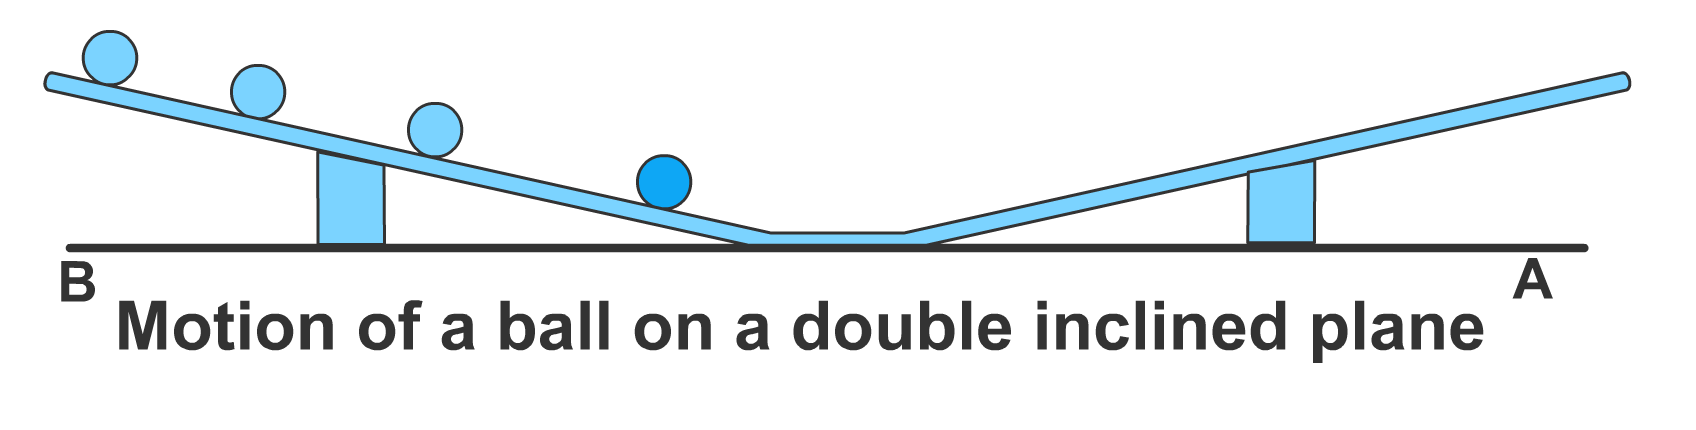
<small>image credit: https://amrita.olabs.edu.in/</small>

⛏️ To counter this challenge, we introduce a new parameter called '**learning rate**', which is basically meant to keep in check the size of steps we take towards the _minimum error checkpost_ ⛳. There is no rocket science here, we just multiply the updated weight with a fraction to keep its size in check.

### 🔙Let us take a step back: What is Gradient Descent?

🖇️The word _gradient_ in english means _'a part sloping upward or downward'_. When we are trying to reduce or eliminate error, we are trying to reach a stable ground truth, similar to a ball rolling down the hill or a man trying to climb up. In order to either reach the bottom or top, both ball or man may take longer strides initially but as they reach closer to the target, steps will get smaller and smaller to avoid overshooting it. In this context, the gradient is a vector that contains the direction of the steepest step a ball or man can take and how long that step should be.

💭 Revise --> slope of a line is represented by the formulae:
$$
y = mx + b
$$

In order to observe steepness of a slope, we start from any starting point and then find derivative to measure the steepness and direction of the slope. This is what we do in linear regression problems to find the line of best fit. 

> 🏹 The aim of Gradient Descent is to minimize the error (or loss function) between predicted value and the actual ouput. And in order to do so, it requires a **_direction_ and _learning rate_** (the size of steps to be taken to reach the minimum point). 



### ↪️ Revisit: Gradient Descent

In the simplified introduction of Gradient Descent, we were calculting both _direction_ and _amount_ of change in one step only. We now break this process into small steps. First, we calculate the raw error which measures how much the prediction was off from the target value and then we compute the _direction_ and _amount_ a weight needs to change to reduce error.

In [ ]:
# Gradient Descent Example:
weight = 0.02
actual_output = 0.82
input = 5.5
alpha = 0.027 # learning rate, try changing this value to see how quickly prediction changes
# Number of times iteration will run. Can be given any arbitrary number and played around.
iteration_steps = 4
for iteration in range(iteration_steps):
    prediction = input * weight
    error = (prediction - actual_output) ** 2
    pure_error = prediction - actual_output
    weight_delta = input * pure_error    
    #weight = weight - weight_delta
    weight = weight - (weight_delta * alpha) # incorporating learning rate, play around
    print("Error:" + str(error) + " Prediction:" + str(prediction))

⬆️In the above computation, we have introduced a small but critical parameter called **_learning rate_**. It is the scaling factor that controls the magnitude of the weight updates to ensure that the network learns at a controlled and stable pace. By multiplying _weight_delta_ with learning rate, we adjust the step size of the weight update. 

But wait! what is this _weight_delta_ ? 🤷‍♂️

💡 _weight_delta_ is the measure of how much a weight was responsible in the error. It is calculated by scaling the 'pure error'(gap between actual and predicted value) with the input value. This step is similar to the earlier step to account for scaling, negative reversal, and stopping.

🔍 If we look closely, the input value and the actual output value is fixed for a neural network. At this point, it boils down to tweaking the weight and learning rate to reduce the error. Hence, we can define an error as a function of weight. 

📈 Let us take the above example and plot the error function:
$$
error=((0.5⋅weight)−0.8)^2
$$


In [ ]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# Set Seaborn style for a clean look
sns.set(style="whitegrid")

# Define the weight range and compute error
weights = np.linspace(0, 0.25, 500)  # Range for weight values
errors = ((5.5 * weights) - 0.82) ** 2

# Identify the special points
weight_zero = 0
error_at_weight_zero = ((5.5 * weight_zero) - 0.82) ** 2

# Find the weight that minimizes the error
optimal_weight = 0.82 / 5.5  # Solve 0.5 * weight - 0.8 = 0
min_error = ((5.5 * optimal_weight) - 0.82) ** 2  # Should be 0

# Plotting
plt.figure(figsize=(8, 6))
plt.plot(weights, errors, label="Error vs Weight", color="blue", linewidth=2)

# Highlight the special points
plt.scatter(weight_zero, error_at_weight_zero, color="red", s=100, label="Weight = 0", edgecolor="black")
plt.scatter(optimal_weight, min_error, color="green", s=100, label="Error = 0 (Optimal Weight)", edgecolor="black")

# Add annotations for clarity
plt.text(weight_zero, error_at_weight_zero + 0.01, f"({weight_zero}, {error_at_weight_zero:.2f})", color="red")
plt.text(optimal_weight, min_error - 0.03, f"({optimal_weight:.2f}, {min_error})", color="green")

# Add titles and labels
plt.title("Error as a Function of Weight", fontsize=14)
plt.xlabel("Weight", fontsize=12)
plt.ylabel("Error", fontsize=12)
plt.axhline(0, color='black', linewidth=0.7, linestyle='--')  # Horizontal reference line
plt.axvline(0, color='black', linewidth=0.7, linestyle='--')  # Vertical reference line
plt.legend(fontsize=10)
plt.grid(True, alpha=0.5)

# Show the plot
plt.show()


👁️ **Observations:** 
- When weight is zero, the model prediction is quite far away from the actual output.
- At weight 0.15, prediction matches the target and error is zero. This is optimal weight.
- Notice the convergence of gradient at weight 1.6
- If we draw a slope before 0.15, derivative will be negative, which basically means: if the slope is   negative, increasing the weight decreases the error.
- If we draw a slope after 0.15, derivative will be positive, which basically means: if the slope is   positive, increasing the weight increases the error.

🔑 Derivative is the relationship or marker of sensitivity between two variables in a function. 

📌 **Gradient descent uses the derivative to iteratively adjust the weight by moving in the direction of negative slope, hence the name 'Gradient Descent'.**
_If the evidence at hand consistently points towards the truth, we give it more weight or else if it suggests otherwise, we consider it unreliable and give it less weightage._

⏭️ So far we have been using Gradient Descent with single input and output, now we raise the complexity.

### 🫸Gradient Descent with multiple inputs

In the earlier step, for updating weight of a single input to get the prediction closer to actual output, we calculated its corresponding '**_weight_delta_**' by scaling the 'pure error' with the input value, which gave us a derivative based estimate about the direction and amount we should be adjusting the weight.

In the case of multiple inputs, we follow the same process. Since, each weight is associated with a particular input value, in order to calculate the corresponding _weight_delta_, we scale the 'pure error' with each input value.

⏭️ For clarity, let us expand the original example.

Revisiting the neural network code which we had written earlier:

In [43]:
# Weighted Sum function
def w_sum(a, b):
    if (len(a) == len(b)):
        output = 0
    for i in range(len(a)):
        output += (a[i] * b[i])
    return output
# Setting up Neural Network
def neural_network(input,weights):
    pred = w_sum(input,weights)
    return pred

In [44]:
# Function to calculate derivative wrt each input and pure error
def ele_mul(scalar, vector):
    out = [0,0,0,0]
    for i in range(len(out)):
        out[i] = vector[i] * scalar
    return out

In [45]:
# Gradient Descent example with multiple inputs
person_height = [5.5, 2.5, 6.4, 7, 2.3]
person_weight = [150, 30, 180, 220, 25]
person_age = [25, 4, 30, 35, 3]
person_greying = [0.2, 0.0, 0.1, 0.3, 0.0]
alpha = 0.01 #learning rate
weights = [0.02, 0.001, 0.005, 0.1] # initial weight for height weight  age greying respectively
input = [person_height[0],person_weight[0],person_age[0], person_greying[0]] # first set of input

win_or_lose_binary = [1, 0, 1, 1, 0] 
true = win_or_lose_binary[0] # Actual result for first set of input

In [ ]:
pred = neural_network(input,weights)
error = (pred - true) ** 2
pure_error = pred - true
weight_deltas = ele_mul(pure_error, input)

# Adjusting weight after considering learning rate 'alpha'
for i in range(len(weights)):
    weights[i] -= alpha * weight_deltas[i]
    
print("Weights:" + str(weights))
print("Weight Deltas:" + str(weight_deltas))

In [ ]:
# Make neural networks learn by running few iterations
# weight reset
weights = [0.02, 0.001, 0.005, 0.1] # initial weight for height weight  age greying respectively
alpha = 0.0008 #learning rate

for iter in range(4):

    pred = neural_network(input,weights)

    error = (pred - true) ** 2
    delta = pred - true

    weight_deltas=ele_mul(delta,input)

    print("Iteration:" + str(iter+1))
    print("Pred:" + str(pred))
    print("Error:" + str(error))
    print("Delta:" + str(delta))
    print("Weights:" + str(weights))
    print("Weight_Deltas:")
    print(str(weight_deltas))
    print(
    )

    for i in range(len(weights)):
        weights[i]-=alpha*weight_deltas[i]

👁️ **Key Observation:**
- Weight corresponding to the input 'weight' is updated significantly compared to other weights.

🔑 Since, the input 'weight' value for first set of input is comparatively larger than values of other inputs i.e. '150' in comparison to '5.5', '25' and '0.2'; the weight corresponding to this input gets away with significant chunk of updates while rest of the other weights are neglected to some extent. 

🔦 Hint: We scale 'pure error' with input value to get derivatives corresponding to each input. The weight associated with the largest input dominates the learning process since its gradient is the largest.

🚨 However, this is not an ideal scenario in most use cases, as we had discussed earlier as well. For example, area of a property might be 1500 sqft, but the price of the same property might have a figure like $1,00,000. In this case, price factor will dominate the neural network learning process, which is not accepted.

⛏️ Therefore, there arises the need to adjust the scales of input values through the process of **Normalization** (_explained in earlier section_), so that all input values take equal part in the learning process of the neural network. This makes sure that gradients are calculated uniformly and so do weight adjustments. 


### 🫸 Gradient Descent: Multiple Inputs and Multiple Outputs

In the first section, we have already built a network with multiple inputs and outputs. We start from there and introduce gradient descent method to make our network learn better.

In [48]:
# Vector-Matrix multiplication function which calculates the weighted sum of inputs w.r.t to weights
def vect_mat_mul(input, weights):
    if len(input) == len(weights[0]):
        output = [0, 0]  # Adjusted to 2 outputs
        for i in range(len(weights)):  # Loop for each output
            # Calculate weighted sum for each output
            output[i] = w_sum(input, weights[i])
    return output

# Setting up Neural Network
def neural_network(input, weights):
    pred = vect_mat_mul(input, weights)
    return pred

In [49]:
# Setting up input and output parameters
# defining input parameters
person_height = [5.5, 2.5, 6.4, 7, 2.3]
person_weight = [150, 30, 180, 220, 25]
person_age = [25, 4, 30, 35, 3]
person_greying = [0.2, 0.0, 0.1, 0.3, 0.0]

#            height weight  age greying
ip_weights = [[0.15, 0.01, 0.02, 0.5],  # Weights for adult probability output
              [0.2, 0.005, 0.01, 0.4]]  # Weights for overall health score output
# learning rate
alpha = 0.01
# first set of input   
input = [person_height[0],person_weight[0],person_age[0], person_greying[0]] 
# actual output for adult probablity and health score
actual_output  = [0.82, 0.90]

pred = neural_network(input,ip_weights)

error = [0, 0] 
delta = [0, 0]

# now that we have multiple output, we consider each outcome and its relation to each input
for i in range(len(actual_output)):
    error[i] = (pred[i] - actual_output[i]) ** 2
    delta[i] = pred[i] - actual_output[i]

🖐️ This code is demonstrating a single step of training our neural network. We can play with it and add iterations to it.

In [ ]:
import numpy as np

# Weight Delta calculation
def outer_prod(a, b):
    
    # just a matrix of zeros
    out = np.zeros((len(a), len(b)))

    for i in range(len(a)):
        for j in range(len(b)):
            out[i][j] = a[i] * b[j]
    return out
# Note: The function above will create a 2x4 matrix in our case. 2 outputs and 4 corresponding inputs.
weight_deltas = outer_prod(delta,input)

# Weight Adjustment
for i in range(len(ip_weights)):
    for j in range(len(ip_weights[0])):
        ip_weights[i][j] -= alpha * weight_deltas[i][j]

ip_weights

⏭️ Till now, we have been capturing input and output data points correspoding to a single example. Now this the time we raise the complexity and make neural networks learn all the training data set at once.

### 🫸Training Entire Dataset: Representing dataset in the form of a matrix





In [51]:
import numpy as np
# existing input points
person_height = [5.5, 2.5, 6.4, 7, 2.3]
person_weight = [150, 30, 180, 220, 25]
person_age = [25, 4, 30, 35, 3]
person_greying = [0.2, 0.0, 0.1, 0.3, 0.0]

weights = np.array([0.05, 0.2, 0.07, 0.1])
alpha = 0.001
# representing inputs in proper data set format. Visualize preparing reports in Excel.

#                     height weight age hair_grey                           output:adult/child
input_data = np.array( [[ 5.5, 150, 25, 0.2 ], # first set of input values  | 1 | adult
                        [ 2.5, 30,  4,  0.0 ], # second set of input values | 0 | child
                        [ 6.4, 180, 30, 0.1 ], # and so on..                | 1 | adult
                        [ 7.0, 220, 35, 0.3 ], #                            | 1 | adult
                        [ 2.3, 25,  3,  0.0 ], ] ) #                        | 0 | child

adult_vs_child = np.array( [ 1, 0, 1, 1, 0 ] )

🛗 Now that we have represented input and output data into matrices form (by help of NumPy), we start training our neural network with one set of inputs at a time. 
- So, over a defined iteration (number of steps for training), the network will take first set of inputs, will try to predict, calculate the weight delta and update weights.
- This process will continue for other data sets sequentially.
- Entire process will be repeated for a number of times (iteration) with a goal to find optimal weight configuration for the dataset provided.

👆 The above defined process is called **_Stochastic gradient descent_**. There are other variations as well such as _Full gradient descent_ which updates weight one dataset at a time or _Batch gradient descent_ which updates weight after 'n' number of examples.

In [ ]:
input = input_data[0] 
goal_prediction = adult_vs_child[0]
for iteration in range(40):
    total_error = 0
    for row_index in range(len(adult_vs_child)):
        input = input_data[row_index]
        goal_prediction = adult_vs_child[row_index]
 
        prediction = input.dot(weights)
        
        error = (goal_prediction - prediction) ** 2
        total_error += error
        
        delta = prediction - goal_prediction
        weights = weights - (alpha * (input * delta))
        print("Updated weights:", weights)
        print("Prediction:" + str(prediction))
    print("Error:" + str(total_error) + "\n")

# 3️⃣ Capturing Complex Relationships

👉 Here's what we have done so far:
- Majorly we have been dealing with a simple network, which is basically a **_single layer perceptron_** with input datasets and output.
- We defined error as a function of weight, which means we adjust weight to reduce error.
- We performed above adjustment for some iterations **_hoping_** to optimally adjust weight values to produce minimal error.

🖐️ _Hoping?_ 

🤫 _Confession:_ Yes, in the back of our mind we kind of presumed that input dataset is going to have some kind of correlation with the output. We chose simplest of the scenarios we could to understand the basic functioning of the network components. We did not consider scenarios where there is going to be abolutely no correlation between input and output datasets, which is mostly the case in real world situations. We just briefly introduced the concept of **_Hidden Layers_** and **_backpropagation_** and moved on. In reality, there is hardly a _linear relationship_ between input and output (<small>_Remember the dot product we have been calculating all along_</small>). Although, we all know this for a fact, yet we chose to ignore this for the sake of brevity.

⏭️ Now that we know how different components of a neural network are and how they function with respect to each other, it is time to make things right. We now prepare our network to capture complex relationships.

### 🕸 Capturing Non-Linearity

🌌 We live in a multi-dimensional world. Let us pick a random entity, say a loaf of bread. We can associate multiple dimensions with it for analytics purpose. For example, we can note down length, breadth, and thickness of the bread, which corresponds to its size. Next, we can take a note of the amount of wheat flour and emulsifiers used in the baking process, along with the temperature it has been baked at. The resultant breads might vary in taste and color. However, none of the attributes mentioned earlier are linearly associated with the resultant properties of the bread. If given a task to predict taste based on the attributes mentioned earlier, there will not exist any linear algebraic function which will capture this relationship. _A linear function is one which produces straight line outputs when plotted against available inputs._

`f(x) = W.x + b`

📐 Here, _f(x)_ is a linear function where relationship between input attributes and output is a straight line in multi-dimensional space. W represents the importance given to an input feature. Generally, _(W.x)_ is called weighted sum, which combines all inputs into a single value that reflects the contribution of all features for a given neuron. Since, the weighted sum is constrained to pass through the origin (0, 0) in the input-output space, we add a bias which allows the network to shift the decision boundary.

🪢 However, real world data more than often involves non-linear relationships. And to make predictions based on real world data, the machine learning models based on neural networks have to utilize non-linearity to capture complex relationships. In Mathematical terms, a linear model can only represent straight lines of planes:

`f(x1, x2) = W1.x1 + W2.x2 + b`

🌐 But to capture complex relations which involve complex patterns, curves, or interactions, non-linearity has to be captured by a model. For example, in a binary classification problem, classes cannot be divided by a straight line. Or, in XOR problem, the target output is dependent on combination of inputs rather than direct relation between input and output. More complex problems like image recognition requires recognizing patterns like edges, shapes, and textures, which are non-linearly related to the pixel values. Due to market complexities, stock market prediction based on historical data cannot be linear. To capture non-linearity, neural networks make use of activation functions, represented as:

`f(x1,x2) = f'(W1.x1 + W2.x2 + b)`

This activation function _f'_ can produce outputs which can capture curves, kinks, etc. Depending upon the problem statement, the suitable activation function(s) is/are picked by data scientists and most of the times it is a case of trial and error. 

🔧 The **_sigmoid activation_** function is often used to squash the output of a neuron into a bounded range, specifically between 0 and 1. This property makes it well-suited for tasks where the network’s output needs to represent probabilities or binary classifications. By confining the output values within a limited range, the sigmoid function ensures that predictions remain within a meaningful and interpretable range. 

> 🚧 **Caution:** While the sigmoid activation function does introduce some level of nonlinearity, it is less effective at combating the vanishing gradient. The _vanishing gradient problem occurs_ when gradients become very small during backpropagation, leading to negligible updates to the network’s parameters. This issue is particularly problematic for deep networks with many layers, as the gradients can diminish exponentially as they are propagated backward. When gradients are small, the network updates its parameters at a sluggish pace, effectively impeding the model’s ability to learn from the data. This can result in networks that fail to capture complex patterns and fail to generalize well to new data. Due to the vanishing gradient problem, using the sigmoid activation function between hidden layers is generally not recommended, especially for deep networks. more modern activation functions, such as ReLU and its variants (Leaky ReLU, Parametric ReLU), have become more popular choices for hidden layers. These functions address the vanishing gradient issue more effectively and enable faster convergence.

⏭️ Now we enhance our previous code to capture non-linearity:

In [ ]:
import numpy as np

# Sigmoid activation function and its derivative
def sigmoid(x):
    return 1 / (1 + np.exp(-x))

def sigmoid_derivative(x):
    return x * (1 - x)

# Initialize inputs and target outputs
input_data = np.array([
    [5.5, 150, 25, 0.2],  # height, weight, age, hair_grey
    [2.5, 30, 4, 0.0],
    [6.4, 180, 30, 0.1],
    [7.0, 220, 35, 0.3],
    [2.3, 25, 3, 0.0]
])
adult_vs_child = np.array([1, 0, 1, 1, 0])
# # Min values for [height, weight, age, hair greying]
# min_values = [2.3, 25, 3, 0.0]
# # Max values for [height, weight, age, hair greying]
# max_values = [7.0, 250, 100, 1.0]
# Normalize the inputs
min_values = np.min(input_data, axis=0)
max_values = np.max(input_data, axis=0)
normalized_input = (input_data - min_values) / (max_values - min_values)

# Initialize weights and hyperparameters
weights = np.array([0.05, 0.2, 0.07, 0.1])  # Single layer
alpha = 0.01
epochs = 40

# Training loop
for epoch in range(epochs):
    total_error = 0
    for i in range(len(adult_vs_child)):
        input = normalized_input[i]
        target = adult_vs_child[i]

        # Forward pass
        weighted_sum = np.dot(input, weights)
        prediction = sigmoid(weighted_sum)

        # Error calculation
        error = (target - prediction) ** 2
        total_error += error

        # Backpropagation: compute gradient
        delta = (target - prediction) * sigmoid_derivative(prediction)

        # Weight update
        weights += alpha * input * delta

    print(f"Epoch {epoch + 1}, Total Error: {total_error}")

print("Final weights:", weights)


👁️ **Observations:**
- The sigmoid activation function has been applied on weighted sum to transform it into a value between 0 and 1. When weighted sum is is very large (positive), sigmoid becomes 1 anc conversely it approaches 0. 
    - For classification problems (like adult vs. child), the sigmoid output can be interpreted as a probability.
    - It also helps the network to approximate non-linear relationships in the data and thus allowing the model to solve more complex problems.
- The Sigmoid derivative tells us how much sigmoid function changes when weighted sum changes.
- Since sigmoid squashes the output between 0 and 1, to capture the activation function's role in the sensitivity of the output to changes in the input weights, we scale the previous delta calculation with _sigmoid derivative_.
    - We are basically propagating error backward and scaling it by how much each weight contributes to the error.
    - This means if the derivative (change) is small, we update the weight less and vice versa.

### ↪️ Revisit: 🥷 Hidden Layers 🥷

🧐 **But why?**

Because we do not live in a simple world. World is complex, full of layers. It may sound laughable at the moment but let us look at some analogies.

- To present the entire context about Neural Networks, I chose Letters → (formed) Words → (formulated) Phrases → (completed) Sentences → (presented) Context. 
- When we watch a picture on a device, it is composed of Pixels → Edges → Shapes → Objects → Scene.
- When we listen to a song, it is composed of Sounds → Phonemes → Words → Sentences → Meaning.

🙃 It would be really absurd if we think a single layer perceptron model can capture complexities of the world.

🤔 **How multiple layer helps?**
Since, in real world, it is often the case that input does not correlate directly with the output, we introduce intermediate layer(s), which act as intermediary state which has some correlation with respect to output. 

Say, we want to classify an image as cat or dog. A single layer may be able to detect simple features like ear, nose, etc,. but it will not sufficient to distinguish how these features combine to form a cat or dog. The model will be inaccurate. If we introduce multiple layers in the model, we can divide the task to different layers. First layer will detect edges and curves, second layer will combine edges into parts and subsequent layer(s) will eventually combine parts into an object which can be matched with the label of cat or dog. 

⏭️ Now we incorporate this in our code:

In [ ]:
# Multi-Layer Neural Network with Backpropagation
np.random.seed(42)

# Initialize inputs and target outputs
input_data = np.array([
    [5.5, 150, 25, 0.2],  # height, weight, age, hair_grey
    [2.5, 30, 4, 0.0],
    [6.4, 180, 30, 0.1],
    [7.0, 220, 35, 0.3],
    [2.3, 25, 3, 0.0]
])
adult_vs_child = np.array([1, 0, 1, 1, 0])

# Normalize the inputs
normalized_input = (input_data - min_values) / (max_values - min_values)

# Initialize weights for input-to-hidden and hidden-to-output
weights_input_hidden = np.random.rand(4, 3)  # 4 inputs -> 3 hidden nodes
print(weights_input_hidden)
weights_hidden_output = np.random.rand(3, 1)  # 3 hidden nodes -> 1 output
print(weights_hidden_output)
# Hyperparameters
alpha = 0.1 #learning rate
epochs = 40 #iterations


👁️ **Observations:**

- We are introducing a 3-node hidden layer between 4-node input layer and 1-node output layer.
- Since, each feature of input layer connects to every node in the hidden layer, so there are [4x3=12]weights. Hence, `weights_input_hidden` has a shape of [4x3]. 
- Weights are initialized so that each weight starts with a slightly different value.
- Input has been transposed to 4x1 (from 1x4) so that it matches shape of the weights matrix dimensions.


In [ ]:
# Training loop
for epoch in range(epochs):
    total_error = 0
    for i in range(len(normalized_input)):
        input = normalized_input[i].reshape(-1, 1)  # Column vector
        target = adult_vs_child[i]

        # Forward pass
        hidden_layer_input = np.dot(input.T, weights_input_hidden)  # Input to hidden layer
        hidden_layer_output = sigmoid(hidden_layer_input)  # Apply activation function

        final_layer_input = np.dot(hidden_layer_output, weights_hidden_output)  # Hidden to output layer
        prediction = sigmoid(final_layer_input)  # Apply activation function

        # Error calculation
        error = (target - prediction) ** 2
        total_error += error

        # Backpropagation
        # Output layer delta
        delta_output = (target - prediction) * sigmoid_derivative(prediction)

        # Hidden layer delta
        delta_hidden = delta_output.dot(weights_hidden_output.T) * sigmoid_derivative(hidden_layer_output)

        # Update weights
        weights_hidden_output += alpha * hidden_layer_output.T.dot(delta_output)
        weights_input_hidden += alpha * input.dot(delta_hidden)

    print(f"Epoch {epoch + 1}, Total Error: {total_error}")

print("Final weights (input to hidden):", weights_input_hidden)
print("Final weights (hidden to output):", weights_hidden_output)

👁️ **Observations:**
- The prediction is computed layer by layer. 
    - From input to hidden layer, Weighted Sum is calculated by `np.dot(input.T, weights_input_hidden)`.
    - From hidden to output layer, Weighted Sum is calculated by `np.dot(hidden_layer_output, weights_hidden_output)`.
- The sigmoid function has been applied in both steps to ensure non-linearity.
- Weights are being updated layer by layer using _backpropagation_.
